In [1]:
import geojson
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#open('./sms-call-internet-mi-2013-11-05.csv').read().index('\0')

In [3]:
dfs = pd.DataFrame({})

for i in range(1,10):
    #print(i)
    df = pd.read_csv('./csv/sms-call-internet-mi-2013-11-0{}.csv'.format(i), encoding='utf-8', parse_dates=['time'])
    dfs = dfs.append(df)

#Read day 10 too
df = pd.read_csv('./csv/sms-call-internet-mi-2013-11-10.csv', parse_dates=['time'])
dfs = dfs.append(df)

dfs = dfs.fillna(0)

In [4]:
num = int(10001)
#arr_mean_smsin = np.zeros(num)
#arr_mean_smsout = np.zeros(num)
#arr_mean_callin = np.zeros(num)
#arr_mean_callout = np.zeros(num)
#arr_mean_internt = np.zeros(num)

means = np.loadtxt("means_it.csv", delimiter=',')
arr_mean_smsin = means[0]
arr_mean_smsout = means[1]
arr_mean_callin = means[2]
arr_mean_callout = means[3]
arr_mean_internt = means[4]

'''
for i in range(1,num):
    sindata = dfs[dfs.cellid==i]['smsin']
    soutdata = dfs[dfs.cellid==i]['smsout']
    cindata = dfs[dfs.cellid==i]['callin']
    coutdata = dfs[dfs.cellid==i]['callout']
    intdata = dfs[dfs.cellid==i]['internet']
    
    arr_mean_smsin[i] = np.mean(sindata)
    arr_mean_smsout[i] = np.mean(soutdata)
    arr_mean_callin[i] = np.mean(cindata)
    arr_mean_callout[i] = np.mean(coutdata)
    arr_mean_internt[i] = np.mean(intdata)
    
    if i==round(num*0.25):
        print('25% completed')
    if i==round(num/2):
        print('50% completed')
    if i==round(num*0.75):
        print('75% completed')
'''

"\nfor i in range(1,num):\n    sindata = dfs[dfs.cellid==i]['smsin']\n    soutdata = dfs[dfs.cellid==i]['smsout']\n    cindata = dfs[dfs.cellid==i]['callin']\n    coutdata = dfs[dfs.cellid==i]['callout']\n    intdata = dfs[dfs.cellid==i]['internet']\n    \n    arr_mean_smsin[i] = np.mean(sindata)\n    arr_mean_smsout[i] = np.mean(soutdata)\n    arr_mean_callin[i] = np.mean(cindata)\n    arr_mean_callout[i] = np.mean(coutdata)\n    arr_mean_internt[i] = np.mean(intdata)\n    \n    if i==round(num*0.25):\n        print('25% completed')\n    if i==round(num/2):\n        print('50% completed')\n    if i==round(num*0.75):\n        print('75% completed')\n"

In [5]:
#arr_mean_smsin
means = np.array([arr_mean_smsin, arr_mean_smsout, arr_mean_callin, arr_mean_callout, arr_mean_internt])
np.savetxt("means_it.csv", means, delimiter=',')
#Faster import for later uses
means

array([[ 0.        ,  0.24864198,  0.25240357, ...,  0.85951729,
         0.52062905,  0.46413149],
       [ 0.        ,  0.13516453,  0.13702929, ...,  0.45698275,
         0.31464368,  0.31289798],
       [ 0.        ,  0.15117862,  0.15344061, ...,  0.55461302,
         0.3613126 ,  0.34119178],
       [ 0.        ,  0.16151485,  0.16414064, ...,  0.62988837,
         0.40491361,  0.37599364],
       [ 0.        ,  4.02803006,  4.04597714, ..., 15.54708477,
         9.02019496,  7.25042572]])

/home/manu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


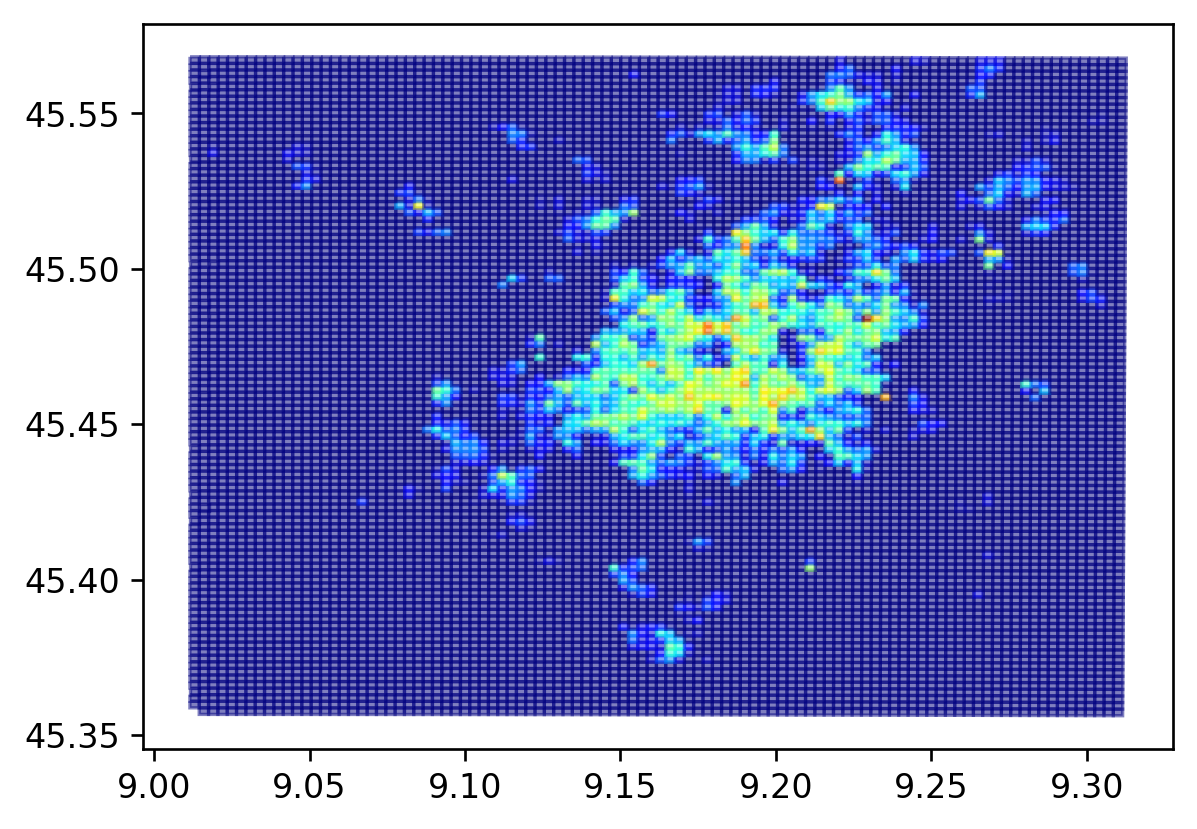

In [6]:
from descartes import PolygonPatch
#from mpl_toolkits.basemap import Basemap
with open("./geojsons/milano-grid.geojson") as json_file:
    json_data = geojson.load(json_file)

BLUE = '#6699cc'
fig = plt.figure(dpi=240) 
ax = fig.gca() 

coordlist = json_data.features[1]['geometry']['coordinates'][0]

#print(json_data.features[1]['geometry'])

import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib as mpl

arr_mean_log = np.log(arr_mean_callin)

jet = cm = plt.get_cmap('jet') 

cNorm  = colors.Normalize(vmin=0, vmax=np.max(arr_mean_log))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
#print(scalarMap.get_clim())

for i in range(1,10000):
    poly = json_data.features[i]['geometry']
    colorVal = scalarMap.to_rgba(arr_mean_log[i])
    ax.add_patch(PolygonPatch(poly, fc=colorVal, ec=colorVal, alpha=0.5, zorder=2 ))
ax.axis('scaled')

plt.show()

/home/manu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


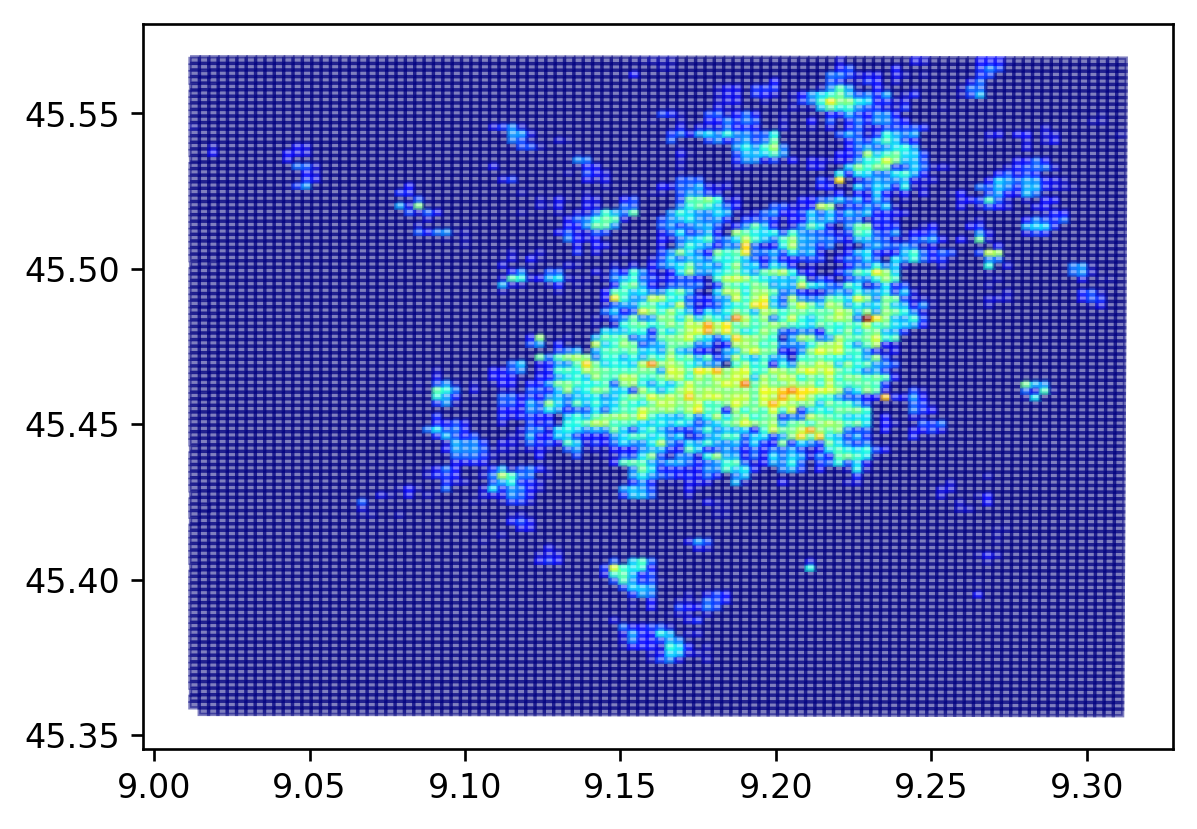

In [7]:
BLUE = '#6699cc'
fig = plt.figure(dpi=240) 
ax = fig.gca() 

coordlist = json_data.features[1]['geometry']['coordinates'][0]

#print(json_data.features[1]['geometry'])

import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib as mpl

arr_mean_log = np.log(arr_mean_callout)

jet = cm = plt.get_cmap('jet') 

cNorm  = colors.Normalize(vmin=0, vmax=np.max(arr_mean_log))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
#print(scalarMap.get_clim())

for i in range(1,10000):
    poly = json_data.features[i]['geometry']
    colorVal = scalarMap.to_rgba(arr_mean_log[i])
    ax.add_patch(PolygonPatch(poly, fc=colorVal, ec=colorVal, alpha=0.5, zorder=2 ))
ax.axis('scaled')


plt.show()

/home/manu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


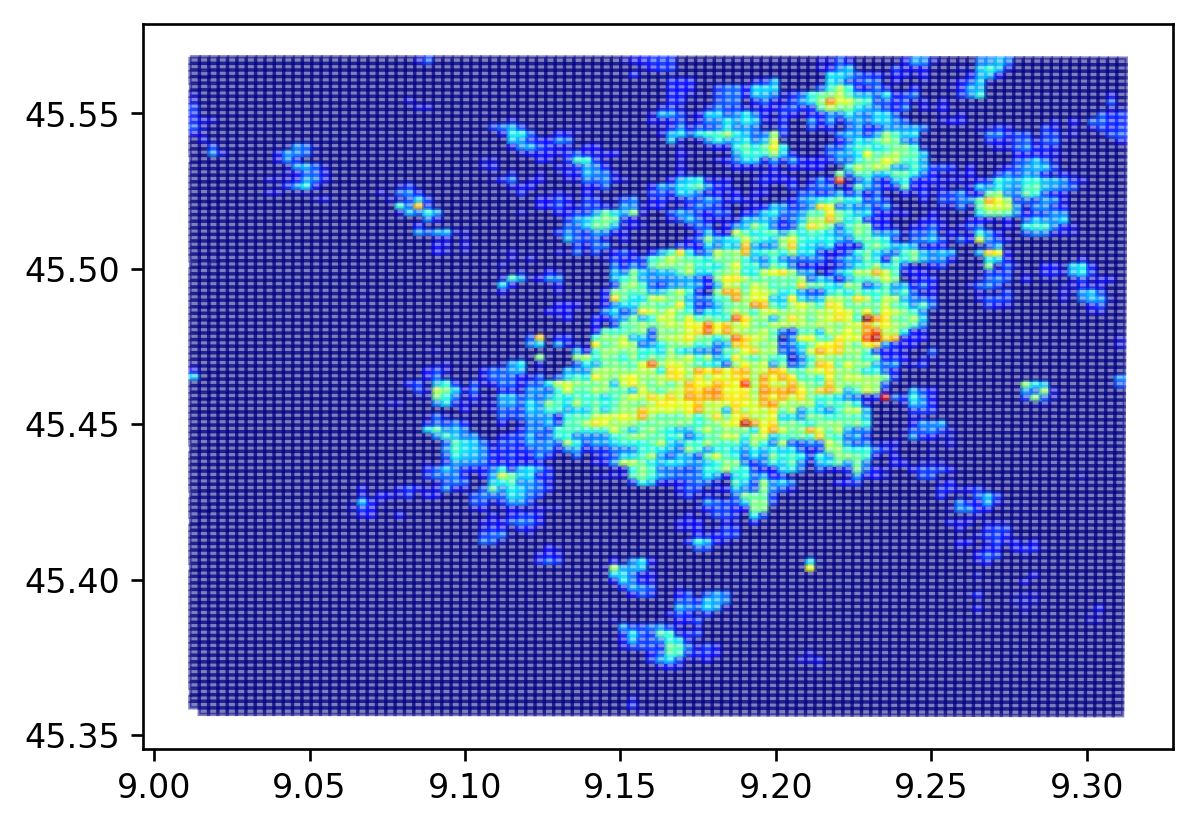

In [8]:
BLUE = '#6699cc'
fig = plt.figure(dpi=240) 
ax = fig.gca() 

coordlist = json_data.features[1]['geometry']['coordinates'][0]

#print(json_data.features[1]['geometry'])

import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib as mpl

arr_mean_log = np.log(arr_mean_smsin)

jet = cm = plt.get_cmap('jet') 

cNorm  = colors.Normalize(vmin=0, vmax=np.max(arr_mean_log))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
#print(scalarMap.get_clim())

for i in range(1,10000):
    poly = json_data.features[i]['geometry']
    colorVal = scalarMap.to_rgba(arr_mean_log[i])
    ax.add_patch(PolygonPatch(poly, fc=colorVal, ec=colorVal, alpha=0.5, zorder=2 ))
ax.axis('scaled')


plt.show()

/home/manu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


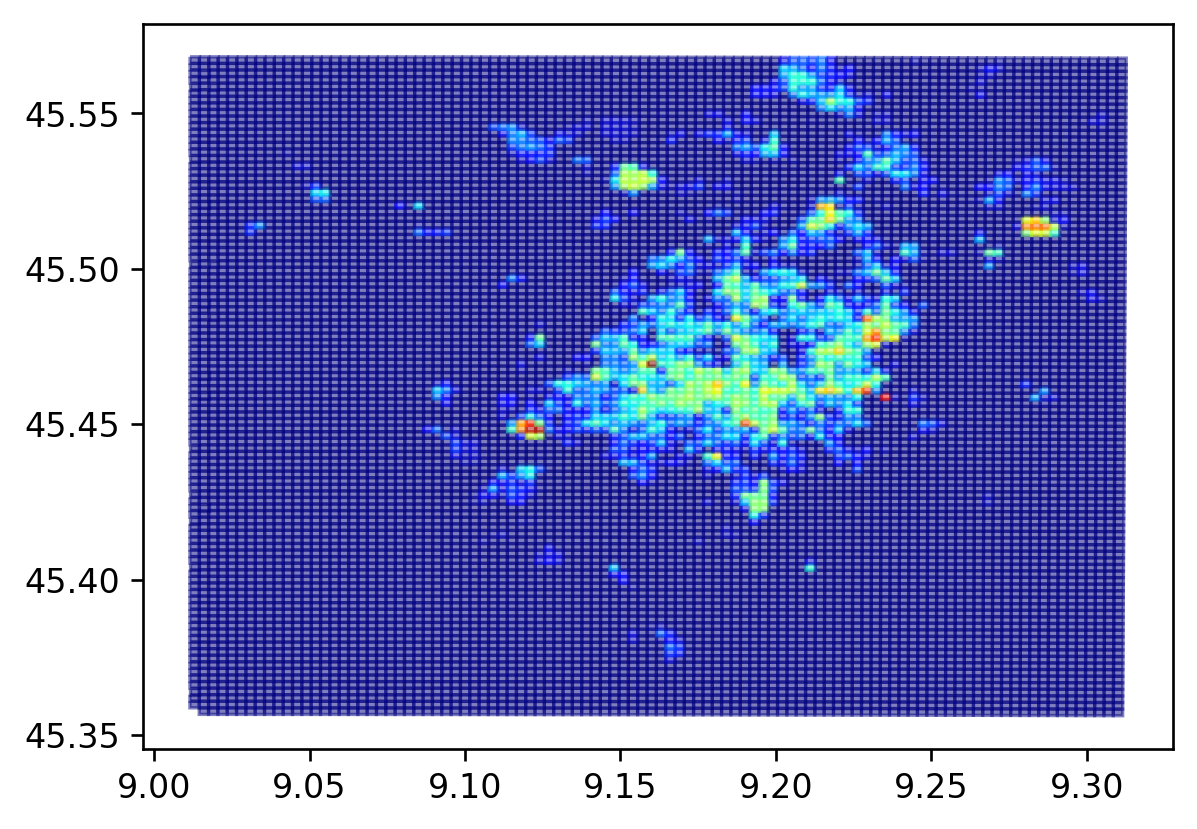

In [9]:
BLUE = '#6699cc'
fig = plt.figure(dpi=240) 
ax = fig.gca() 

coordlist = json_data.features[1]['geometry']['coordinates'][0]

#print(json_data.features[1]['geometry'])

import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib as mpl

arr_mean_log = np.log(arr_mean_smsout)

jet = cm = plt.get_cmap('jet') 

cNorm  = colors.Normalize(vmin=0, vmax=np.max(arr_mean_log))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
#print(scalarMap.get_clim())

for i in range(1,10000):
    poly = json_data.features[i]['geometry']
    colorVal = scalarMap.to_rgba(arr_mean_log[i])
    ax.add_patch(PolygonPatch(poly, fc=colorVal, ec=colorVal, alpha=0.5, zorder=2 ))
ax.axis('scaled')


plt.show()

/home/manu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


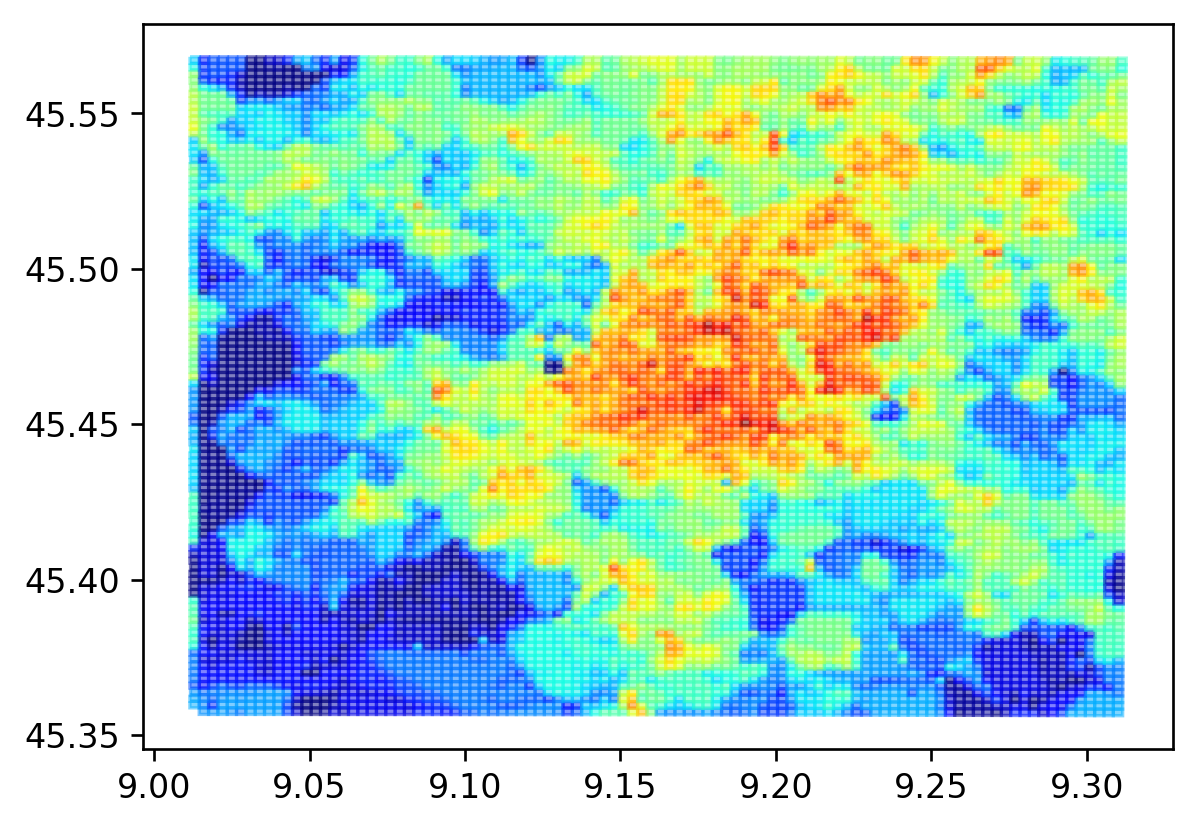

In [10]:
BLUE = '#6699cc'
fig = plt.figure(dpi=240) 
ax = fig.gca() 

coordlist = json_data.features[1]['geometry']['coordinates'][0]

#print(json_data.features[1]['geometry'])

import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib as mpl

arr_mean_log = np.log(arr_mean_internt)

jet = cm = plt.get_cmap('jet') 

cNorm  = colors.Normalize(vmin=0, vmax=np.max(arr_mean_log))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
#print(scalarMap.get_clim())

for i in range(1,10000):
    poly = json_data.features[i]['geometry']
    colorVal = scalarMap.to_rgba(arr_mean_log[i])
    ax.add_patch(PolygonPatch(poly, fc=colorVal, ec=colorVal, alpha=0.5, zorder=2 ))
ax.axis('scaled')

plt.show()